# Perceptron

Perception is one of the earliest forms of Artificial Neural Networks. Developed in 1957, by Frank Rosenblatt, the Perceptron is very simple (compared to more current concepts). It uses a *threshold logic unit* (TLU). This artificial neuron takes has numerical inputs and outputs (instead of binary) and each input connection is assosciated with a weight. The TLU computes a weighted sum of its inputs   
($z = w_1x_1 + w_2x_2 + ... + w_{n}x_{n} = x^Tw$), then applies a *step function* to that sum and outputs the result:  
$h_w(x) = step(z)$, where $z = x^Tw$.

![Threshold Logic Unit](image.png)  
*Threshold Logic Unit*

The most common step function used in Perceptrons is the *Heaviside step function*, but sometimes the sign function is also used.
$$
\begin{equation*}
\text{heaviside} (z) =
\begin{cases}
    0 \ \text{if} \ z \lt 0\\
    1 \ \text{if} \ z \geq 0
\end{cases} \quad
\text{sgn} (z) =
\begin{cases}
    &{-1} \ &\text{if} \ z \lt 0\\
    & 0 \ &\text{if} \ z = 0\\
    &+1 \ &\text{if} \ z \gt 0
\end{cases}
\end{equation*}
$$
Training the TLU in this case means finding the right values for $\bm{w}$.

![Perceptron Diagram](image-1.png)

## Mathematical Underpinning

**In the description of the process and the practical examples below, we will assume $x \in \mathbb{R}^2$ and utilize the activation function of $\text{sign}(z)$. Furthermore, this is a single-layer perceptron which can only separate data into 2 distinct classes.**

The pre-activation process begins (initially) by arbitrarily setting the weights (to a zero vector $\overline{0}$ for example); in each progressive step, the weights will be updated and used. Next, take the linear combination of the weights, $\overline{w}$ (inlcuding an extra element $w_0$ to represent the bias $b$) and the corresponding feature values $\overline{x}$ (including an extra column of 1 to account for the bias $b$). This will provide $z$ which we can then apply to our activation function, e.g. $\text{sign}(z)$ or $\text{heaviside}(z)$:

\begin{equation*}
    z = \overline{w}^T\overline{x}^{(i)}
\end{equation*}

Next, the prediction is made based on the value of $z$. It can be 1 of 3 outcomes:

$$\begin{align*}
    {-1}& \ &\text{if} \ z \lt 0\\
    0& \ &\text{if} \ z = 0\\
    +1& \ &\text{if} \ z \gt 0
\end{align*}$$

The update formula for the new weights $\overline{w}$ is calculated with (the hyperparameter) $\eta$, the current row $x^{(i)}$, the predicted classification/label $\hat{y}^{(i)}$, the actual classification/label $y$, and the current/old weights $\overline{w}$:

$$
    \overline{w} := \overline{w} - \eta \cdot \left(\hat{y}^{(i)} - y \right) \cdot \overline{x}
$$

Obviously, the prediction is either correct or incorrect. Let's examine when the prediction is correct.

---

### Correct Predictions

+ The prediction correctly predicted 1:
$$
\overline{w}_{\text{new}} := \overline{w}_{\text{old}} - \eta \cdot \left(1 - 1\right) \cdot \overline{x} \\
\overline{w}_{\text{new}} := \overline{w}_{\text{old}} - \eta \cdot \left(0\right) \cdot \overline{x} \\
\overline{w}_{\text{new}} := \overline{w}_{\text{old}} - 0 \\
\overline{w}_{\text{new}} := \overline{w}_{\text{old}} 
$$

+ The prediction correctly predicted -1:
$$
\overline{w}_{\text{new}} := \overline{w}_{\text{old}} - \eta \cdot \left(-1 - (-1)\right) \cdot \overline{x} \\
\overline{w}_{\text{new}} := \overline{w}_{\text{old}} - \eta \cdot \left(0\right) \cdot \overline{x} \\
\overline{w}_{\text{new}} := \overline{w}_{\text{old}} - 0 \\
\overline{w}_{\text{new}} := \overline{w}_{\text{old}} 
$$

In both cases, the weights were accurate enough to provide a correct prediction, so they shouldn't yet be changed. 
Now, we can examine the three four of of an incorrect prediction.

---

### Incorrect Predictions

It is important to consider the definition/implication of the dot product of vectors geometrically here.  
Recall the definition for the dot product of vectors:

$$ \bold{u}\cdot\bold{v} = \Vert u\Vert\Vert v\Vert\cos(\theta)$$

Furthermore, when $\cos(\theta) \gt 0$, then $0 \lt \theta \lt 90$.  
If $\cos(\theta) = 0$, then the vectors are orthogonal ($\theta = 90$).  
Lastly, if $\cos(\theta) \lt 0$, then $90 \lt \theta \lt 180$.  

![Graphical represention of Dot Products](image-2.png)

In our context, $\bold{u}$ and $\bold{v}$ are $\overline{w}$ and $\overline{x}^{(i)}$. In order to correctly classify, the algorithm must drive the weights to converge to values that adequetely separate all of the data.

---

+ The prediction incorrectly predicted 1:
$$
\overline{w}_{\text{new}} := \overline{w}_{\text{old}} - \eta \cdot \left(1 - (-1)\right) \cdot \overline{x} \\
\overline{w}_{\text{new}} := \overline{w}_{\text{old}} - \left(2\right)\eta\overline{x}
$$

The algorithm incorrectly asserts $\overline{w}^T\overline{x}^{(i)} \gt 0$, when in fact $\overline{w}^T\overline{x}^{(i)} \lt 0$.  
In other words, the vectors $\overline{w}$ and $\overline{x}^{(i)}$ are *similarly* directed when they shouldn't be.
The algorithm then adjusts the weights to ensure that they are more accurate and the angle ($\theta$) between our two vectors ($\overline{w}$ and $\overline{x}^{(i)}$) is obtuse.

+ The prediction incorrectly predicted -1:
$$
\overline{w}_{\text{new}} := \overline{w}_{\text{old}} - \eta \cdot \left(-1 - (1)\right) \cdot \overline{x} \\
\overline{w}_{\text{new}} := \overline{w}_{\text{old}} + \left(2\right)\eta\overline{x} \\
\overline{w}_{\text{new}} := \overline{w}_{\text{old}}
$$

Similarly, the algorithm incorrectly asserts $\overline{w}^T\overline{x}^{(i)} \lt 0$, when in fact $\overline{w}^T\overline{x}^{(i)} \gt 0$.  
Conversely to the first error, the vectors $\overline{w}$ and $\overline{x}^{(i)}$ are *differently* directed when they shouldn't be.
Again, the algorithm then adjusts the weights to ensure that they are more accurate and the angle ($\theta$) between our two vectors ($\overline{w}$ and $\overline{x}^{(i)}$) is acute.

+ The prediction incorrectly predicted 0:
$$
\overline{w}_{\text{new}} := \overline{w}_{\text{old}} - \eta \cdot \left(0 - (\pm 1)\right) \cdot \overline{x} \\
\overline{w}_{\text{new}} := \overline{w}_{\text{old}} - \eta \cdot \left(0\right) \cdot \overline{x} \\
\overline{w}_{\text{new}} := \overline{w}_{\text{old}} - 0 \\
\overline{w}_{\text{new}} := \overline{w}_{\text{old}} 
$$

This equation represents two errors, and they behaves similarily to the first two. However, these adjustments depends on the true value $y^{(i)}$ and corrects at a slower rate.  

---

This pre-activation/activation process reoccurs for each observation of $x$, or $n$ times. Furthermore, this process will iterate $T$ times, which is a hyperparameter set often refered to as the *epochs*. Upon completion of sufficiently many epochs with linearly separable data, the hyperplane described by $w$ (including the bias) will separate the two classes. It is also important to understand that this solution is not unique; there are infinitely many hyperplanes that separate the classes.

## Programming Implementation

Following, there is a manual conception of perceptron via a Python class with methods to fit, calculate the weighted sum at the $i$th row, and predict values. All of the model parameters (weights and bias) are self contained; the hyperparameters are given at the instantiation of the object.

### Libraries

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

Randomly generating 100 points from $x \in [-50,50]$ and $y \in [-50,50]$ to create 100 random points in 2 distinct clusters

Below is a custom function to make somewhat circular aggregations of data to have clearly defined clusers/classes.

In [113]:
def round_cluster(center, radius, num_points, cluster_label):
    h, k = center
    theta = np.random.uniform(0, 2*np.pi, num_points) # randomly generates num_points values of degrees.
    r = np.sqrt(np.random.uniform(0, 1, num_points)) * radius  # randomly takes num_points scalars of the radius from 0-1
    x = r * np.cos(theta) + h   # finds the cartesian coordinates for x for all num_points
    y = r * np.sin(theta) + k   # finds the cartesian coordinates for y for all num_points
    x = np.round(x,1)   # rounds x to the tenth
    y = np.round(y,1)   # rounds y to the tenth
    labels = np.full(num_points, cluster_label) # creaes an array of length num_points full of the provided cluster_label
    return x, y, labels

center1 = (-25, 25)
center2 = (25, -25)
radius = 25
num_points = 100


# creates two clusters of n=num_points
x1, y1, labels1 = round_cluster(center1, radius, num_points, 1)
x2, y2, labels2 = round_cluster(center2, radius, num_points, 2)

x_coords = np.concatenate([x1, x2])
y_coords = np.concatenate([y1, y2])
labels = np.concatenate([labels1, labels2])

# creates a dataframe of length 2*num_points for both clusters and their labels
df = pd.DataFrame({"x" : x_coords, "y" : y_coords, "label" : labels})


This is a visualization of the clusters to ensure it went as expected.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


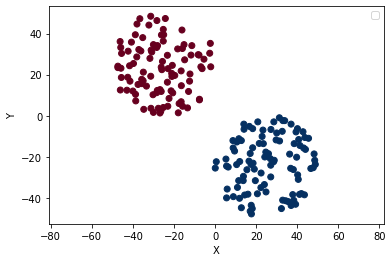

In [114]:
plt.scatter(df["x"], df["y"], c=df["label"], cmap = "RdBu")

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.axis('equal')  # Set equal scaling for a more accurate representation
plt.show()

Now, the implementation. The class constructor defaults the hyperparameters to $\eta = 0.5$ and epochs = 100. Here, instead of a zero vector $\overline{0}$ for the weights (and bias),  a random value between 0 and 1 is chosen.

In [115]:
class Perceptron(object):
    def __init__(self, eta = 0.5, epochs = 100) -> None:
        self.epochs = epochs
        self.eta = eta
    def fit(self, X, y):
        self.w1 = np.random.rand(1)
        self.w2 = np.random.rand(1)
        self.b = np.random.rand(1)

        self.errors = []

        for _ in range(self.epochs):
            errors = 0
            for i, xi in enumerate(X):
                update = self.eta * (self.predict(xi) - y[i])
                self.w1 = self.w1 - update*xi[0]
                self.w2 = self.w2 - update*xi[1]
                self.b = self.b - update
                errors = errors + int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors.append(errors)
        
        return self
    
    def weighted_sum(self, x):
        self.w = np.array([self.w1, self.w2])
        return np.dot(x, self.w) + self.b
    
    def predict(self, x):
        return np.where(self.weighted_sum(x) > 0.0, 1, -1)   


It is important that both the $\bold{X}$ matrix and the $y$ vector are arrays in order to utilize `np.dot()`. Also, the labels for the clusters must be 1 and -1.

In [116]:
X = df[["x","y"]].to_numpy()
y = np.where(df['label'] == 1, 1, -1)

In [117]:
percept = Perceptron()

percept.fit(X,y)

C:\Users\Josh\AppData\Local\Temp\ipykernel_7764\3911486117.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors = errors + int(update != 0)


In [118]:
y_pred = percept.predict(X).reshape(200)
print(np.array_equiv(y, y_pred))

True


<AxesSubplot:>

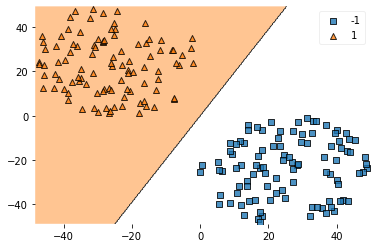

In [119]:
plot_decision_regions(X, y, clf = percept)

In [149]:
percept.w, percept.b

(array([[ 40.18139426],
        [-17.55223547]]),
 array([94.25261218]))

### Second Example

Here is another example involving data with covariance closer to $\pm1$.



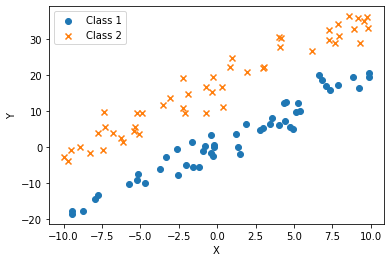

In [138]:
num_points = 50

# Generate random points for class 1
class1_x = np.random.uniform(-10, 10, num_points)
class1_y = 2 * class1_x + np.random.normal(0, 3, num_points)

# Generate random points for class 2
class2_x = np.random.uniform(-10, 10, num_points)
class2_y = 2 * class2_x + 17 + np.random.normal(0, 3, num_points)

# Concatenate the points and labels
x = np.concatenate([class1_x, class2_x])
y = np.concatenate([class1_y, class2_y])
labels = np.concatenate([np.ones(num_points), -np.ones(num_points)])

# Shuffle the data
indices = np.arange(2 * num_points)
np.random.shuffle(indices)
x = x[indices]
y = y[indices]
labels = labels[indices]

# Plot the points
plt.scatter(class1_x, class1_y, label='Class 1', marker='o')
plt.scatter(class2_x, class2_y, label='Class 2', marker='x')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

C:\Users\Josh\AppData\Local\Temp\ipykernel_7764\3911486117.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  errors = errors + int(update != 0)


<AxesSubplot:>

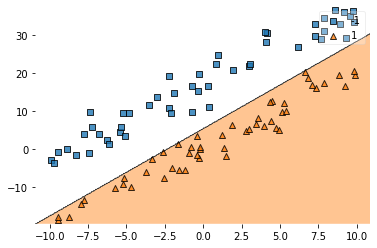

In [139]:
df = pd.DataFrame({"x" : x, "y" : y, "class" : labels})
X = df[["x","y"]].to_numpy()
y = df["class"].to_numpy().astype(int)
percept.fit(X,y)
y_pred = percept.predict(X).reshape(len(X))

plot_decision_regions(X,y, percept)

In [140]:
np.array_equal(y, y_pred)

True

In [148]:
percept.w, percept.b

(array([[ 40.18139426],
        [-17.55223547]]),
 array([94.25261218]))